In [64]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import numpy as np
import scipy.stats as stats
import scipy

import statsmodels.formula.api as smf

import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #用来自定义图表风格的模块

#magic command
%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from matplotlib.font_manager import FontProperties #画图自定义字体
from pylab import mpl #画图自定义字体
mpl.rcParams['font.sans-serif']=['SimHei'] #指定默认字体

导入回报率、通货膨胀率——见‘第五代码’

In [65]:
#导入数据
data=pd.read_csv('E:/Python Github HW/ZhaoQy/000001-24.9.30.csv')
data['Day']=pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day',inplace=True)
data['Close']=pd.to_numeric(data['Close'],errors='coerce')
data['Preclose']=data['Close'].shift(1)  #实现数据平移，向下移动一行数据
data['Return']=(data['Close']-data['Preclose'])/data['Preclose']
data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return
Day,,,,,,,,
1990-12-19,NaN,96.050,99.980,95.790,99.980,126000.00,4.940000e+05,NaN
1990-12-20,99.980,104.300,104.390,99.980,104.390,19700.00,8.400000e+04,0.044109
1990-12-21,104.390,109.070,109.130,103.730,109.130,2800.00,1.600000e+04,0.045407
1990-12-24,109.130,113.570,114.550,109.130,114.550,3200.00,3.100000e+04,0.049666
1990-12-25,114.550,120.090,120.250,114.550,120.250,1500.00,6.000000e+03,0.049760
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [66]:
data_new=data['1995-01':'2024-09'].copy() #深复制
data_new['Close']=pd.to_numeric(data_new['Close'])
data_new['Preclose']=pd.to_numeric(data_new['Preclose'])
#计算上证指数日收益率
data_new['Raw_return']=data_new['Close']/data_new['Preclose']-1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return,Raw_return
Day,,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035,-0.023035
...,...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131,0.036131


In [67]:
Month_data=data_new.resample('ME')['Raw_return'].apply(lambda x:(1+x).prod()-1).to_frame()
Month_data

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [68]:
inflation=pd.read_csv('E:/Python Github HW/ZhaoQy/inflation.csv')
inflation['month']=pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation.sort_values(by=['month'],axis=0,ascending=True)

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2024-05-31,0.3
2024-06-30,0.2
2024-07-31,0.5


In [69]:
reg_data=pd.merge(Month_data,inflation,left_index=True,right_index=True)
reg_data

,Raw_return,cpi
1995-01-31,-0.131631,24.1
1995-02-28,-0.023694,22.4
1995-03-31,0.177803,21.3
1995-04-30,-0.103552,20.7
1995-05-31,0.207922,20.3
...,...,...
2024-05-31,-0.005801,0.3
2024-06-30,-0.038684,0.2
2024-07-31,-0.009656,0.5
2024-08-31,-0.032849,0.6


In [70]:
market_varince=data_new.resample('ME').apply(
    {
        'Raw_return':lambda x:sum(x**2)
    }
)
market_varince.reset_index(inplace=True)
market_varince.rename(columns={'Day':'month','Raw_return':'RV'},inplace=True)
market_varince.set_index('month',inplace=True)
market_varince

,RV
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2024-05-31,0.000915
2024-06-30,0.000642
2024-07-31,0.001441


In [71]:
reg_data=pd.merge(Month_data,inflation,left_index=True,right_index=True,how='inner')
reg_data=pd.merge(reg_data,market_varince,left_index=True,right_index=True,how='inner')
reg_data

,Raw_return,cpi,RV
1995-01-31,-0.131631,24.1,0.005695
1995-02-28,-0.023694,22.4,0.018086
1995-03-31,0.177803,21.3,0.013378
1995-04-30,-0.103552,20.7,0.008281
1995-05-31,0.207922,20.3,0.148387
...,...,...,...
2024-05-31,-0.005801,0.3,0.000915
2024-06-30,-0.038684,0.2,0.000642
2024-07-31,-0.009656,0.5,0.001441
2024-08-31,-0.032849,0.6,0.000705


# 模型

- 股票i，t月d日
- $D_t$：t月交易天数
- $N_d$：d日交易股票数量
- Trademoney：所有成交额
- FloatingValue：流通市值

$$
TO_t=\sum_{d=1}^{D_t}(\frac{\sum_i^{N_d}Trademoney_{i,d,t}}{\sum_i^{N_d}FloatingValue_{i,d,t}})
$$


换手率增加：投资者对于股票市场的判断分歧比较大

$$
R_t=a+b*TO_{t-1}+\epsilon_t
$$

'{:0>6}'.format(x) 是 Python 中的字符串格式化方法，用于将变量 x 格式化为一个长度为 6 的字符串，左侧用零填充。具体解释如下：

{:0>6} 是格式说明符。 0 表示用零填充。 >
 表示右对齐。 6 表示总长度为 6。 例如：

如果 x 是 42，则 '{:0>6}'.format(42) 的结果是 '000042'。 如果 x 是 123456，则结果是 '123456'（因为已经是 6 位长，不需要填充）。 这个方法常用于需要固定长度的字符串表示，例如生成固定长度的编号。

In [88]:
cross=pd.read_csv('E:/Python Github HW/ZhaoQy/cross_section2023.csv')
from pandas.tseries.offsets import MonthEnd

#将`cross`DataFrame 中的`month`列转换为 datetime 类型，并加上`MonthEnd(1)`来获取每个月的最后一天。
cross['month']=pd.to_datetime(cross['month'],format='%Y-%m-%d')+MonthEnd(1)
# 将`to_v`和`floatingvalue`列转换为数值类型
cross['to_v']=pd.to_numeric(cross['to_v'])
cross['floatingvalue']=pd.to_numeric(cross['floatingvalue'])
#使用`dropna`方法删除`to_v`和`floatingvalue`列中包含缺失值的行。
cross=cross.dropna(subset=['to_v','floatingvalue'])
#对`Stkcd`列中的值进行格式化，确保它们都是6位数字，不足的前面补零
cross['Stkcd']=cross['Stkcd'].apply(lambda x:'{:0>6}'.format(x))
cross

,Stkcd,month,Rank,Freq,ret,floatingvalue,totalvalue,sizef,sizet,to_v
0,000001,1991-04-30,1,20.0,NaN,1.157520e+09,2.118487e+09,20.869546,21.473968,0.000506
1,000001,1991-05-31,2,24.0,-0.128345,1.016010e+09,1.859497e+09,20.739149,21.343572,0.007087
2,000001,1991-06-30,3,23.0,-0.119551,9.007350e+08,1.648521e+09,20.618722,21.223144,0.001155
3,000001,1991-07-31,4,16.0,-0.137013,7.828100e+08,1.432695e+09,20.478401,21.082823,0.000230
4,000001,1991-08-31,5,15.0,-0.417680,6.748338e+08,1.346275e+09,20.329977,21.020607,0.072087
...,...,...,...,...,...,...,...,...,...,...
752023,605599,2023-08-31,24,23.0,-0.027103,7.955351e+09,1.054667e+10,22.797111,23.079076,0.134479
752024,605599,2023-09-30,25,20.0,0.071030,8.530295e+09,1.130889e+10,22.866890,23.148855,0.137497
752025,605599,2023-10-31,26,17.0,-0.048696,8.125488e+09,1.077222e+10,22.818272,23.100237,0.086762
752026,605599,2023-11-30,27,22.0,-0.027956,7.908417e+09,1.048444e+10,22.791193,23.073159,0.062795


- stkcd:股票代码
- rank:上市月份
- freq:股票在该月交易天数
- ret：收益率
- floating value:流通市值（常用于计算换手率——能交易部分）
- total value:总市值
- sizef:取自然对数，不改变单调性
- sizet:
- to_v:单个公司的换手率

对`cross`DataFrame 按`month`列进行分组，然后计算每个组（即每个月）的`to_v`列的平均值。最后，将结果存储在一个新的 DataFrame`turnover`中，并将计算结果的列重命名为`'to'`。

In [ ]:
#按 month 列对 cross DataFrame 进行分组
turnover=pd.DataFrame(cross.groupby('month').apply(
    lambda x: 
    np.mean(x['to_v'])#计算每个分组的 to_v 列的平均值
    ,include_groups=False))#确保返回的结果不包含分组键。

# 使用 rename 方法将结果列（默认为 0）重命名为 'to'  
turnover.rename(columns={0:'to'},inplace=True)
turnover


,to
month,
1990-12-31,0.004747
1991-01-31,0.049382
1991-02-28,0.059403
1991-03-31,0.088436
1991-04-30,0.069840
...,...
2023-08-31,0.701059
2023-09-30,0.520542
2023-10-31,0.476984


将`reg_data`DataFrame 和`turnover`DataFrame 进行合并。这里使用的是内连接（`inner`join），这意味着只有当两个 DataFrame 的索引（`index`）相匹配时，对应的行才会出现在结果中。

In [74]:
reg_data =pd.merge(reg_data,turnover,left_index=True,right_index=True,how='inner')
reg_data

,Raw_return,cpi,RV,to
1995-01-31,-0.131631,24.1,0.005695,0.106731
1995-02-28,-0.023694,22.4,0.018086,0.122528
1995-03-31,0.177803,21.3,0.013378,0.455074
1995-04-30,-0.103552,20.7,0.008281,0.346606
1995-05-31,0.207922,20.3,0.148387,0.751097
...,...,...,...,...
2023-08-31,-0.052009,0.1,0.001546,0.701059
2023-09-30,-0.003013,0.0,0.000884,0.520542
2023-10-31,-0.029483,-0.2,0.001068,0.476984
2023-11-30,0.003611,-0.5,0.000497,0.673268


# 换手率图

显示从2000年开始的每月换手率数据

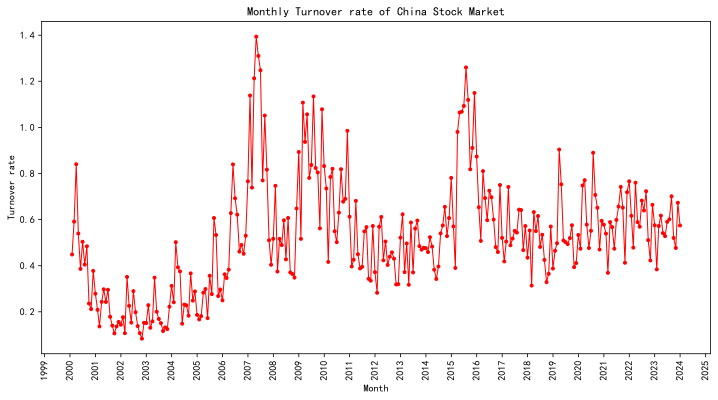

In [ ]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(1,1,1) #在图形中添加一个子图
ax.plot(
    'to', #使用'to'列作为y轴数据
    '.-r',
    linewidth=1,
    data=reg_data['2000':]
)
plt.title('Monthly Turnover rate of China Stock Market')
plt.xlabel('Month')
plt.ylabel('Turnover rate')

data_format =mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
plt.xticks(rotation=90)

plt.show()


从2000年开始每月中国股市的方差(波动率)

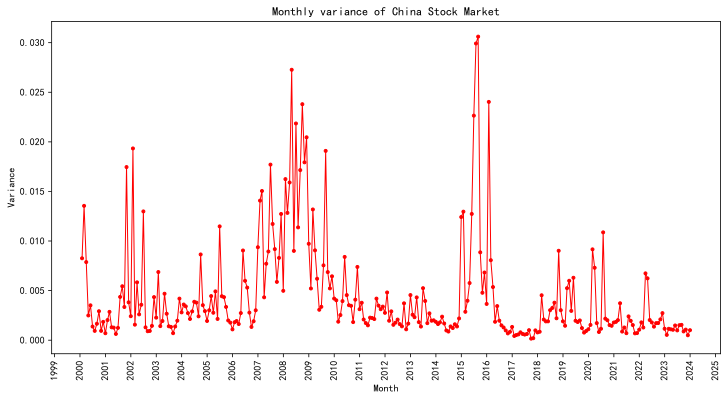

In [76]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(1,1,1)
ax.plot(
    'RV',
    '.-r',
    linewidth=1,
    data=reg_data['2000':]
)
plt.title('Monthly variance of China Stock Market')
plt.xlabel('Month')
plt.ylabel('Variance')

data_format =mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
plt.xticks(rotation=90)

plt.show()

$$
R_t=a+\gamma*RV_{t-1}+\epsilon_t
$$

$$
E_{t-1}(RV_t)
$$

$$
R_t=a+\gamma*TO_{t-1}+\epsilon_t
$$

1. 找更好地预测波动率的指标
2. 模型错了

$$
R_t=a+\gamma*RV_{t-1}+\mathbf{B}*\mathbf{X}_{t-1}+\epsilon_t
$$
模型设定错误：丢失变量问题(Omitted Variable Problem)

## 换手率turnover&波动率RV

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


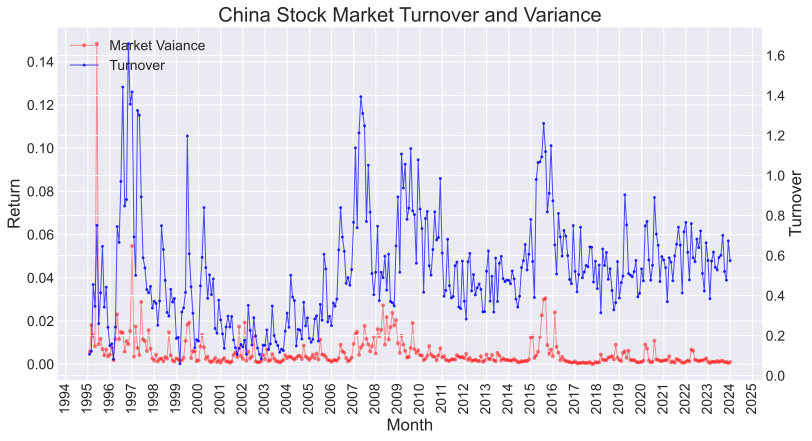

In [ ]:
# Change the figure style
# list the figure style
print(plt.style.available)#打印出所有可用的图形风格
#plt.style.use('ggplot')
# plt.style.use('default'):使用默认的画图风格
plt.style.use('seaborn-v0_8-darkgrid')

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['RV'],
         color='red',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Vaiance')
ax1.set_xlabel('Month')  # 设置横坐标标签
ax1.set_ylabel('Return')  # 设置左边纵坐标标签
#ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("China Stock Market Turnover and Variance")  # 给整张图命名

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(reg_data['to'],
         color='blue',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='Turnover',
         data=reg_data['2000':])
ax2.set_ylabel('Turnover')  # 设置右边纵坐标标签
#ax2.legend(loc=1)  # 设置图例在右上方

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

fig = plt.gcf()
fig.savefig('mvto.pdf', bbox_inches='tight')
plt.show();

## 假定to,RV,cpi有滞后性

- 异方差是指模型的误差项的方差不是常数，而是随着解释变量的变化而变化。异方差会影响最小二乘估计的标准误，导致它们不再是有效的标准误，从而影响t检验和置信区间的准确性。
- 自相关是指时间序列中不同时间点的误差项之间存在相关性。自相关会影响回归模型的有效性，因为它违反了经典线性回归模型的一个关键假设——误差项的独立性。
- 为了解决异方差和自相关的问题，可以使用稳健标准误（也称为异方差和自相关稳健的标准误，HAC）。这种标准误的估计方法可以调整由于异方差和自相关引起的标准误偏差，使得t检验和置信区间更加准确。

换手率->波动率

In [ ]:
reg_data['lto']=reg_data['to'].shift(1)
reg_data['lRV']=reg_data['RV'].shift(1)
reg_data['lcpi']=reg_data['cpi'].shift(1)

model_forecast_rv=smf.ols('RV~lto',data=reg_data['2000':]).fit(
    cov_type='HAC',#指定异方差和自相关稳健的标准误类型
    cov_kwds={'maxlags':6})#指定用于稳健标准误的滞后阶数
print(model_forecast_rv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     6.283
Date:                Wed, 13 Nov 2024   Prob (F-statistic):             0.0127
Time:                        13:17:45   Log-Likelihood:                 1120.5
No. Observations:                 288   AIC:                            -2237.
Df Residuals:                     286   BIC:                            -2230.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0013      0.001      0.997      0.3

波动率->波动率

In [79]:
model_forecast_rv=smf.ols('RV~lRV',data=reg_data['2000':]).fit(
    cov_type='HAC',
    cov_kwds={'maxlags':6})
print(model_forecast_rv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     54.39
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.79e-12
Time:                        13:17:45   Log-Likelihood:                 1174.4
No. Observations:                 288   AIC:                            -2345.
Df Residuals:                     286   BIC:                            -2337.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017      0.000      4.919      0.0

波动率&换手率->波动率

In [80]:
model_forecast_rv=smf.ols('RV~lRV+lto',data=reg_data['2000':]).fit(
    cov_type='HAC',
    cov_kwds={'maxlags':6})
print(model_forecast_rv.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     28.33
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           6.02e-12
Time:                        13:17:45   Log-Likelihood:                 1176.4
No. Observations:                 288   AIC:                            -2347.
Df Residuals:                     285   BIC:                            -2336.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008      0.001      1.153      0.2

市场方差RV的拟合值fitted_RV对原始回报率Raw_return的影响

In [ ]:
reg_data_new=reg_data['2000':].copy()
#将 model_forecast_rv 模型的拟合值（即预测的市场方差）添加到 reg_data_new DataFrame的新列 fitted_RV 中
reg_data_new['fitted_RV']=model_forecast_rv.fittedvalues

model_forecast_return=smf.ols('Raw_return~fitted_RV',data=reg_data_new).fit(
    cov_type='HAC',
    cov_kwds={'maxlags':6})
print(model_forecast_return.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                    0.8056
Date:                Wed, 13 Nov 2024   Prob (F-statistic):              0.370
Time:                        13:17:45   Log-Likelihood:                 355.01
No. Observations:                 288   AIC:                            -706.0
Df Residuals:                     286   BIC:                            -698.7
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0132      0.009      1.549      0.1

In [82]:
model_to=smf.ols('Raw_return~lto',data=reg_data['2000':]).fit(
    cov_type='HAC',
    cov_kwds={'maxlags':6}
)
print(model_to.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3861
Date:                Wed, 13 Nov 2024   Prob (F-statistic):              0.535
Time:                        13:17:45   Log-Likelihood:                 354.46
No. Observations:                 288   AIC:                            -704.9
Df Residuals:                     286   BIC:                            -697.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0025      0.012     -0.214      0.8

# 季度结果

In [83]:
reg_data

,Raw_return,cpi,RV,to,lto,lRV,lcpi
1995-01-31,-0.131631,24.1,0.005695,0.106731,NaN,NaN,NaN
1995-02-28,-0.023694,22.4,0.018086,0.122528,0.106731,0.005695,24.1
1995-03-31,0.177803,21.3,0.013378,0.455074,0.122528,0.018086,22.4
1995-04-30,-0.103552,20.7,0.008281,0.346606,0.455074,0.013378,21.3
1995-05-31,0.207922,20.3,0.148387,0.751097,0.346606,0.008281,20.7
...,...,...,...,...,...,...,...
2023-08-31,-0.052009,0.1,0.001546,0.701059,0.601336,0.001511,-0.3
2023-09-30,-0.003013,0.0,0.000884,0.520542,0.701059,0.001546,0.1
2023-10-31,-0.029483,-0.2,0.001068,0.476984,0.520542,0.000884,0.0
2023-11-30,0.003611,-0.5,0.000497,0.673268,0.476984,0.001068,-0.2


In [ ]:
Qreg_data=reg_data['2000':].copy()
#使用resample方法对 Qreg_data 进行季度（'Q'）重采样，
# 使用季度末（'E'）作为采样点
Qreg_data=Qreg_data.resample('QE').apply(
    {'Raw_return':lambda x:(1+x).prod()-1,#计算每个季度的累积回报率
     'to':lambda x:sum(x),
     'RV':lambda x:sum(x),
     'cpi':lambda x:sum(x)}
)
Qreg_data['lto']=Qreg_data['to'].shift(1)
Qreg_data['lRV']=Qreg_data['RV'].shift(1)
Qreg_data['lcpi']=Qreg_data['cpi'].shift(2)
Qreg_data

,Raw_return,to,RV,cpi,lto,lRV,lcpi
2000-03-31,0.317318,1.880177,0.029683,0.3,NaN,NaN,NaN
2000-06-30,0.071041,1.429640,0.007385,0.3,1.880177,0.029683,NaN
2000-09-30,-0.009310,1.124996,0.005522,0.8,1.429640,0.007385,0.3000
2000-12-31,0.085501,0.867601,0.003498,2.8,1.124996,0.005522,0.3000
2001-03-31,0.018954,0.588428,0.006189,2.0,0.867601,0.003498,0.8000
...,...,...,...,...,...,...,...
2022-12-31,0.021448,1.662505,0.005982,5.5,1.873350,0.004817,6.7304
2023-03-31,0.059432,1.573603,0.002786,3.8,1.662505,0.005982,8.0000
2023-06-30,-0.021632,1.659671,0.003526,0.3,1.573603,0.002786,5.5000
2023-09-30,-0.028603,1.822937,0.003941,-0.2,1.659671,0.003526,3.8000


换手率->回报率

In [85]:
moedel_to_q=smf.ols('Raw_return~lto',data=Qreg_data).fit(
    cov_type='HAC',
    cov_kwds={'maxlags':2}
)

print(moedel_to_q.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.083
Date:                Wed, 13 Nov 2024   Prob (F-statistic):              0.152
Time:                        13:17:46   Log-Likelihood:                 52.704
No. Observations:                  95   AIC:                            -101.4
Df Residuals:                      93   BIC:                            -96.30
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0487      0.043     -1.138      0.2

cpi（通胀率Π）->回报率

In [86]:
moedel_to_q=smf.ols('Raw_return~lcpi',data=Qreg_data).fit(
    cov_type='HAC',
    cov_kwds={'maxlags':2}
)

print(moedel_to_q.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.128
Date:                Wed, 13 Nov 2024   Prob (F-statistic):              0.148
Time:                        13:18:08   Log-Likelihood:                 51.343
No. Observations:                  94   AIC:                            -98.69
Df Residuals:                      92   BIC:                            -93.60
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0422      0.024      1.763      0.0

cpi&换手率->回报率

In [87]:
moedel_to_q=smf.ols('Raw_return~lto+lcpi',data=Qreg_data).fit(
    cov_type='HAC',
    cov_kwds={'maxlags':2}
)

print(moedel_to_q.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.863
Date:                Wed, 13 Nov 2024   Prob (F-statistic):              0.161
Time:                        13:18:50   Log-Likelihood:                 53.263
No. Observations:                  94   AIC:                            -100.5
Df Residuals:                      91   BIC:                            -92.90
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0215      0.043     -0.496      0.6